<a href="https://colab.research.google.com/github/dptristanti/H8_PTP_Final_Image/blob/master/CatDog_Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Final Project - Cat & Dog Classification**


##Import Package



In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import math
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Download Dataset

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 2s 0us/step


In [0]:
train_dataset = os.path.join(PATH, 'train')
test_dataset = os.path.join(PATH, 'validation')

In [0]:
train_cats_dataset = os.path.join(train_dataset, 'cats')  
train_dogs_dataset = os.path.join(train_dataset, 'dogs')  
test_cats_dataset = os.path.join(test_dataset, 'cats')  
test_dogs_dataset = os.path.join(test_dataset, 'dogs')  

In [6]:
total_image_train = len(os.listdir(train_cats_dataset)) + len(os.listdir(train_dogs_dataset))
total_image_test= len(os.listdir(test_cats_dataset)) + len(os.listdir(test_dogs_dataset))

print('total training images:', total_image_train)
print('total testing images:', total_image_test)

total training images: 2000
total testing images: 1000


# Preprocessing Data


In [0]:
#Variable for preprocessing data
BATCH_SIZE = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [8]:
#Preprocessing data use ImageDataGenerator
train_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)
train_data_generator = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dataset,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
test_data_generator = test_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=test_dataset,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Vizualization Training Data

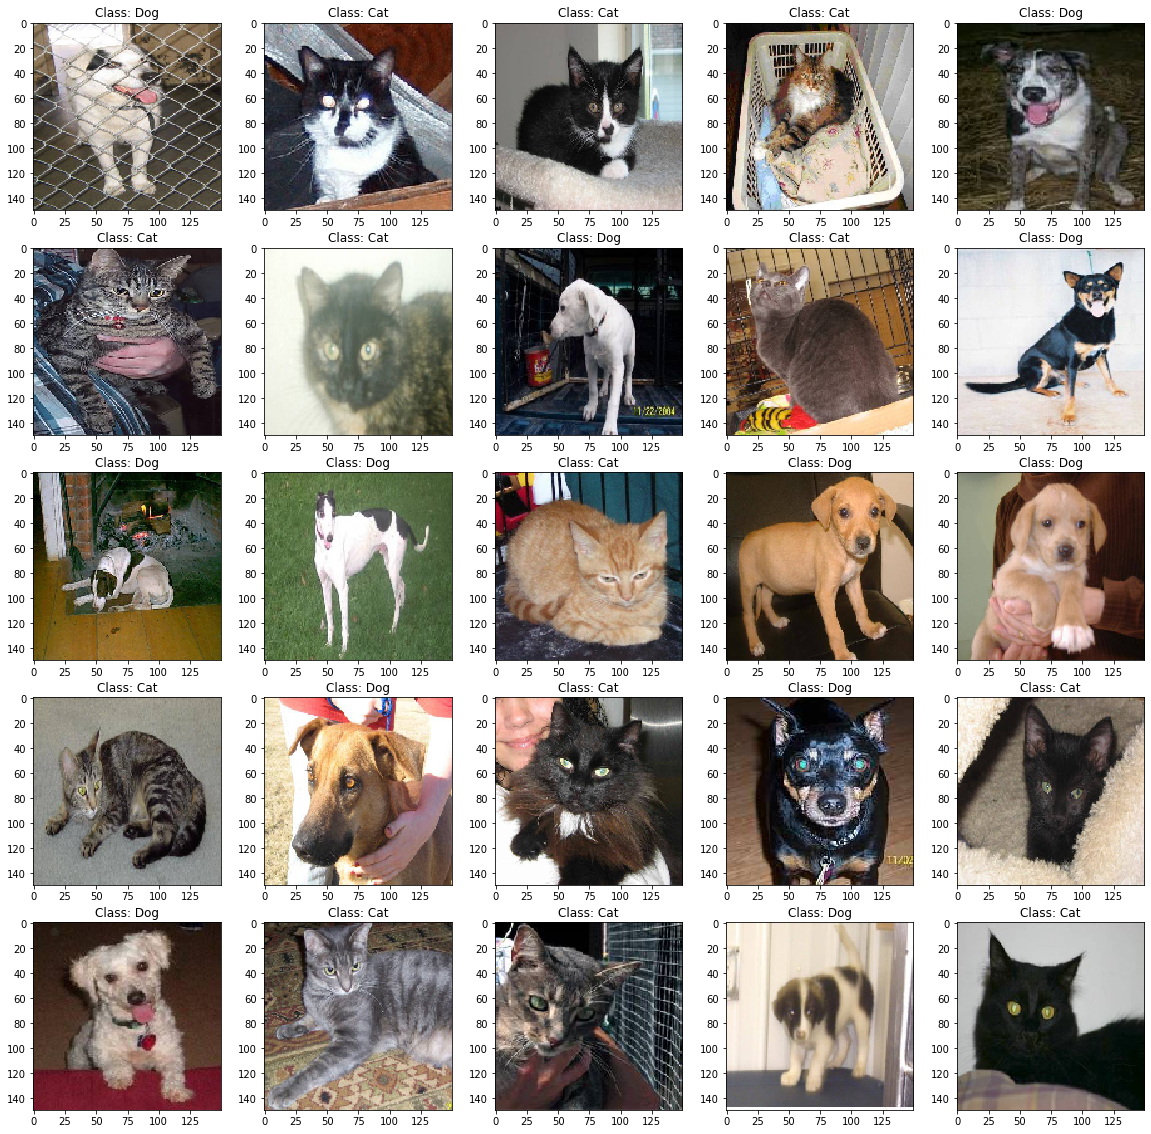

In [9]:
class_names=['Cat','Dog']
# Define "plotImages" function for vizualize data
def plotImages(images_set, label_set):
    fig, axes = plt.subplots(5, 5, figsize=(20,20))
    axes = axes.flatten()
    for images, label, ax in zip( images_set, label_set, axes):
          ax.imshow(images)
          ax.axis()
          no_label = int(label)
          #ax.subplots_adjust(wspace=.5, hspace=.5)
          ax.set_title("Class: {}".format(class_names[no_label]))
    plt.show()
sample_training_images, sample_training_label = next(train_data_generator)

# Memplot data dengan definisi fungsi yang telah dibuat
plotImages(sample_training_images[:25], sample_training_label[:25])



# Define Model

In [10]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [13]:
history = model.fit_generator(
    train_data_generator,
    steps_per_epoch=total_image_train // BATCH_SIZE,
    epochs=epochs,
    validation_data=test_data_generator,
    validation_steps=total_image_test// BATCH_SIZE
)

Epoch 1/15
15/15 [==============================] - 13s 838ms/step - loss: 1.0401 - acc: 0.4947 - val_loss: 0.6897 - val_acc: 0.4989
Epoch 2/15
15/15 [==============================] - 8s 526ms/step - loss: 0.6892 - acc: 0.5139 - val_loss: 0.6835 - val_acc: 0.4989
Epoch 3/15
15/15 [==============================] - 8s 506ms/step - loss: 0.6551 - acc: 0.5486 - val_loss: 0.6045 - val_acc: 0.6507
Epoch 4/15
15/15 [==============================] - 7s 492ms/step - loss: 0.6254 - acc: 0.6282 - val_loss: 0.5956 - val_acc: 0.6819
Epoch 5/15
15/15 [==============================] - 7s 488ms/step - loss: 0.5412 - acc: 0.7142 - val_loss: 0.5796 - val_acc: 0.6496
Epoch 6/15
15/15 [==============================] - 7s 484ms/step - loss: 0.4979 - acc: 0.7377 - val_loss: 0.5785 - val_acc: 0.6931
Epoch 7/15
15/15 [==============================] - 7s 489ms/step - loss: 0.4306 - acc: 0.7890 - val_loss: 0.5874 - val_acc: 0.6908
Epoch 8/15
15/15 [==============================] - 7s 460ms/step - loss: 0

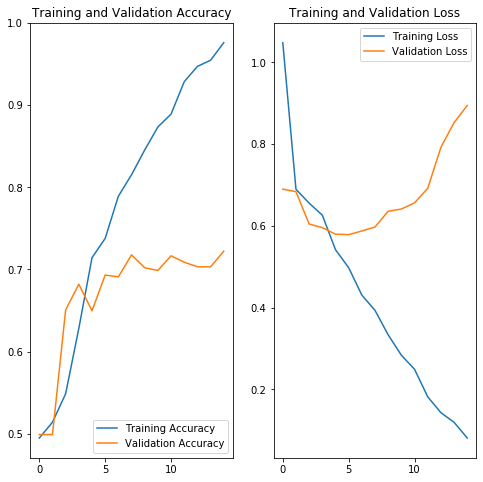

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Dilihat dari hasil diatas

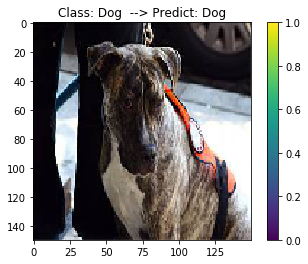

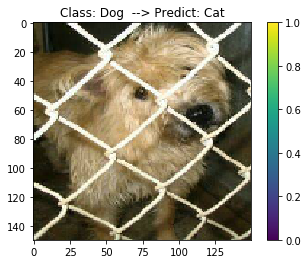

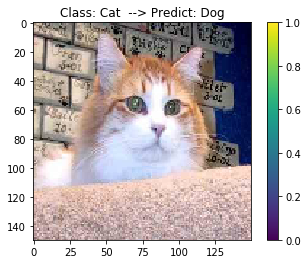

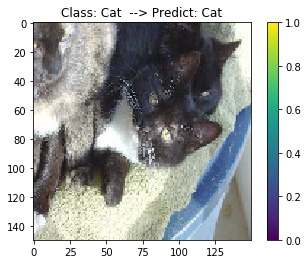

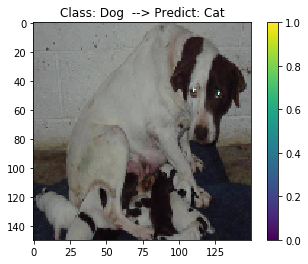

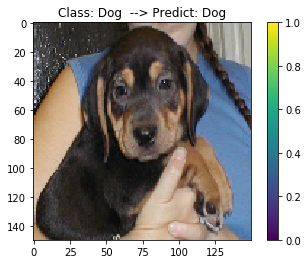

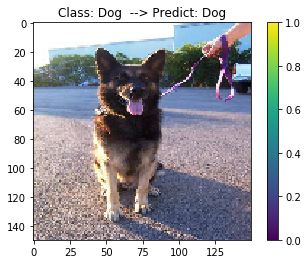

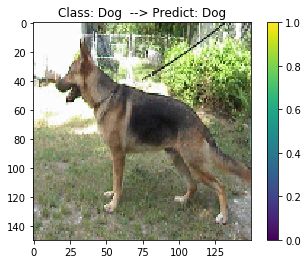

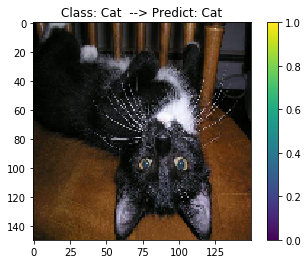

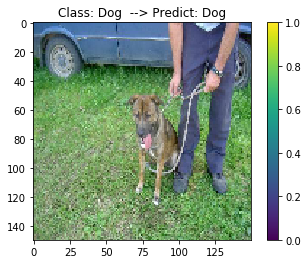

In [15]:
for image_test, label_test in test_data_generator:
  break

pred = model.predict_classes(x = image_test)

for i in range (0,10):
  test_1 = image_test[i]
  lbl_1 = label_test[i]
  lbl_pred_1 =(pred[i])
  plt.figure()
  plt.imshow(test_1)
  plt.title("Class: {}  --> Predict: {}".format(class_names[int(lbl_1)], class_names[int(lbl_pred_1)]))
  plt.colorbar()
  plt.grid(False)
  plt.show


Dilakukan augmentasi 


In [0]:
image_generator_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
train_data_generator = image_generator_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dataset,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [0]:
image_generator_test = ImageDataGenerator(rescale=1./255)
test_data_generator = image_generator_test.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=test_dataset,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [0]:
model_2= Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [0]:
model_2.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 18, 18, 64)       

In [0]:
history = model_2.fit_generator(
    train_data_generator,
    steps_per_epoch=total_image_train // BATCH_SIZE,
    epochs=35,
    validation_data=test_data_generator,
    validation_steps=total_image_test// BATCH_SIZE
)

Epoch 1/35
15/15 [==============================] - 16s 1s/step - loss: 0.4317 - acc: 0.7943 - val_loss: 0.5360 - val_acc: 0.7321
Epoch 2/35
15/15 [==============================] - 16s 1s/step - loss: 0.4479 - acc: 0.7815 - val_loss: 0.5144 - val_acc: 0.7243
Epoch 3/35
15/15 [==============================] - 15s 987ms/step - loss: 0.4389 - acc: 0.7783 - val_loss: 0.4670 - val_acc: 0.7790
Epoch 4/35
15/15 [==============================] - 14s 962ms/step - loss: 0.4215 - acc: 0.7949 - val_loss: 0.4847 - val_acc: 0.7801
Epoch 5/35
15/15 [==============================] - 14s 966ms/step - loss: 0.4289 - acc: 0.7858 - val_loss: 0.5092 - val_acc: 0.7422
Epoch 6/35
15/15 [==============================] - 15s 1s/step - loss: 0.4455 - acc: 0.7828 - val_loss: 0.4813 - val_acc: 0.7455
Epoch 7/35
15/15 [==============================] - 15s 984ms/step - loss: 0.4202 - acc: 0.7901 - val_loss: 0.4674 - val_acc: 0.7779
Epoch 8/35
15/15 [==============================] - 14s 960ms/step - loss: 0.4

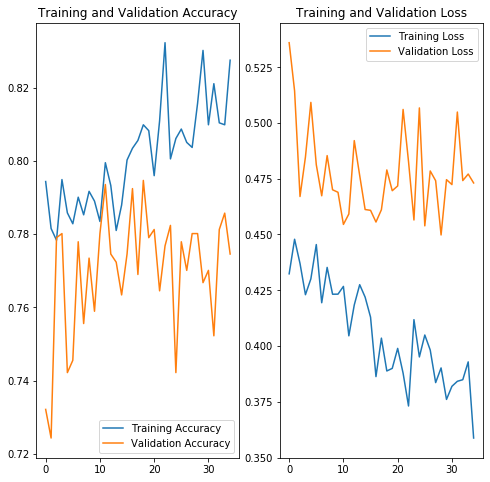

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(35)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

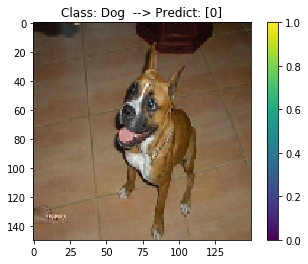

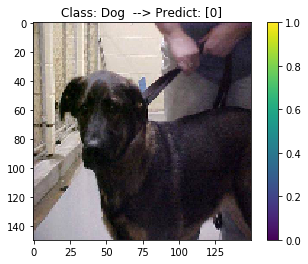

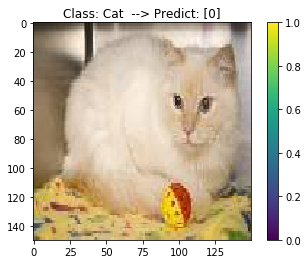

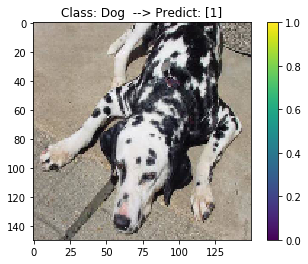

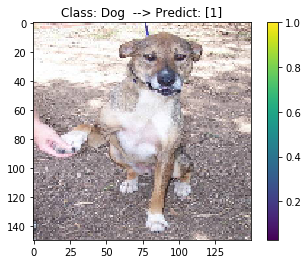

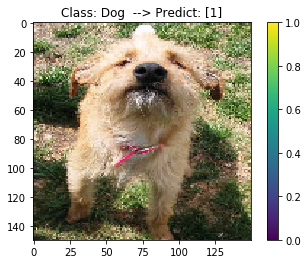

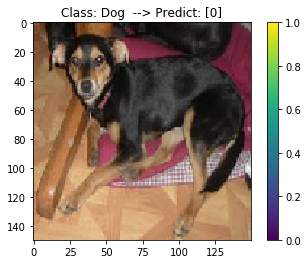

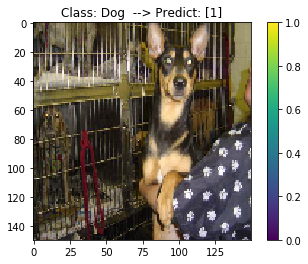

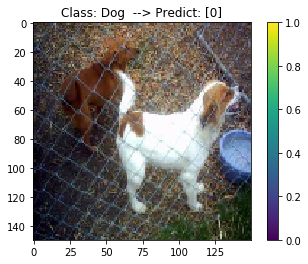

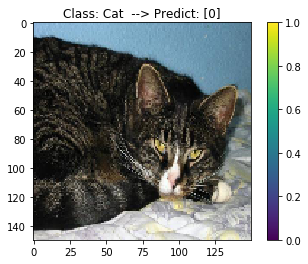

In [0]:
for image_test2, label_test2 in test_data_generator:
  break

pred2 = model_2.predict_classes(x = image_test2)

for i in range (0,10):
  test_1 = image_test2[i]
  lbl_1 = label_test2[i]
  lbl_pred_1 =(pred2[i])
  plt.figure()
  plt.imshow(test_1)
  plt.title("Class: {}  --> Predict: {}".format(class_names[int(lbl_1)], lbl_pred_1))
  plt.colorbar()
  plt.grid(False)
  plt.show